# K- Means Clustering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans
import seaborn as sns
plt.rcParams['figure.figsize'] = 12, 6

In [2]:
# Reading of the csv file
cd = pd.read_csv('clustering_data_1.csv')
cd.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


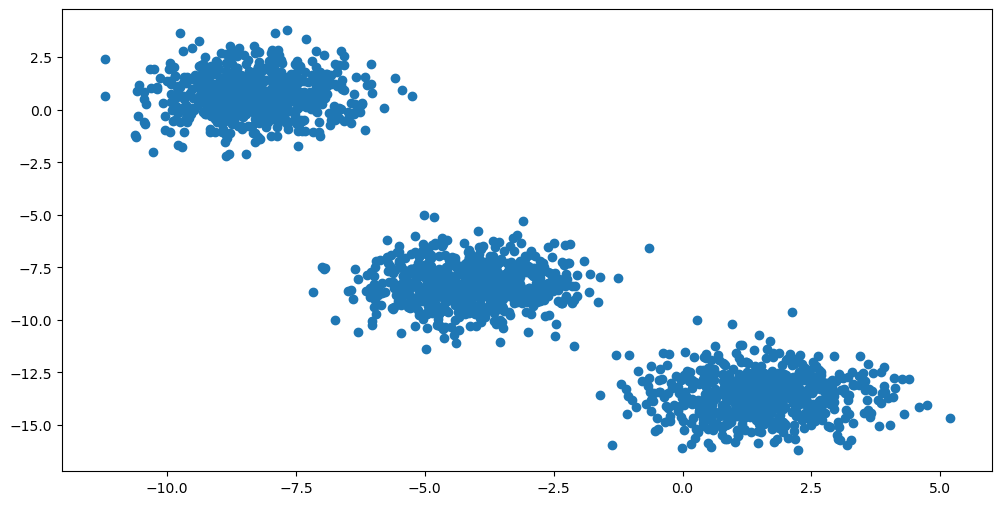

In [3]:
import warnings
warnings.filterwarnings('ignore')

plt.scatter(cd['X'], cd['Y'])
plt.show()

In [4]:
# Creating of 2 clusters
kmean = KMeans(n_clusters = 2)


In [5]:
kmean.fit(cd)

KMeans(n_clusters=2)

In [6]:
cluster_assignment = kmean.predict(cd)

<Axes: xlabel='X', ylabel='Y'>

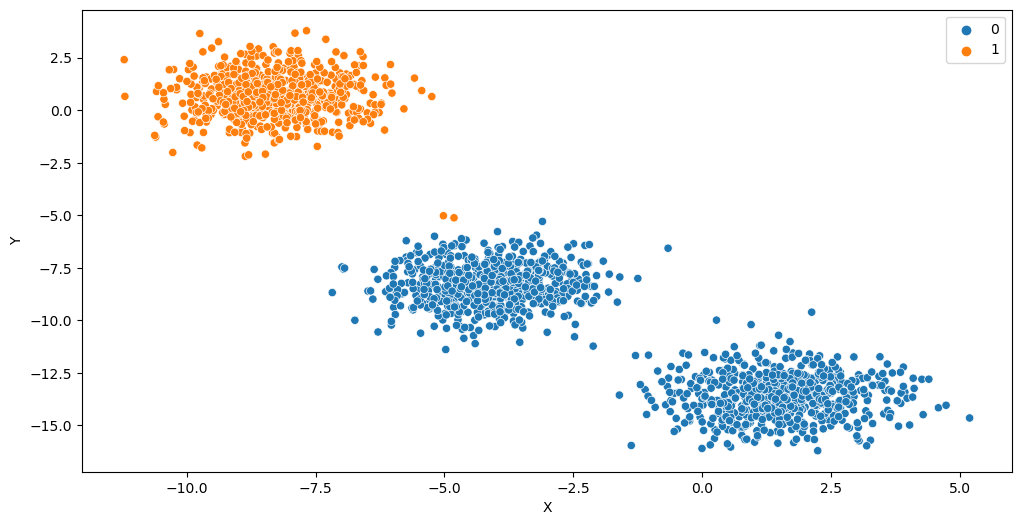

In [7]:
sns.scatterplot(x = cd['X'], y = cd['Y'], hue = cluster_assignment, data = cd)

In [8]:
kmean = KMeans(n_clusters = 3)
kmean.fit(cd)

KMeans(n_clusters=3)

In [9]:
cluster_assignment = kmean.predict(cd)

<Axes: xlabel='X', ylabel='Y'>

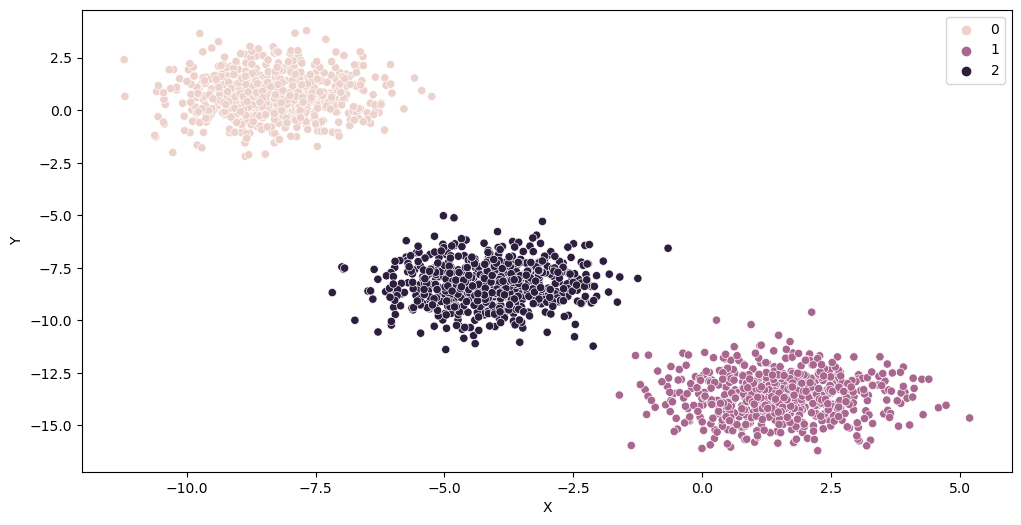

In [10]:
sns.scatterplot(x = cd['X'], y = cd['Y'], hue = cluster_assignment, data = cd)

In [11]:
Y_predict = kmean.fit_predict(cd[['X', 'Y']])
Y_predict

array([1, 2, 1, ..., 0, 0, 1])

In [12]:
cd['predict_cluster'] = Y_predict
cd.head()

,X,Y,predict_cluster
0,-8.659655,1.344655,1
1,-4.765612,-8.923286,2
2,-8.744243,-0.576567,1
3,1.805738,-13.008058,0
4,-4.798434,-8.945116,2


In [13]:
df1 = cd[cd.predict_cluster == 0]
df1.head()

,X,Y,predict_cluster
3,1.805738,-13.008058,0
5,0.500092,-15.206919,0
7,1.415629,-13.319360,0
8,1.204203,-13.471586,0
10,1.762292,-13.957272,0


In [14]:
df2 = cd[cd.predict_cluster == 1]
df3 = cd[cd.predict_cluster == 2]

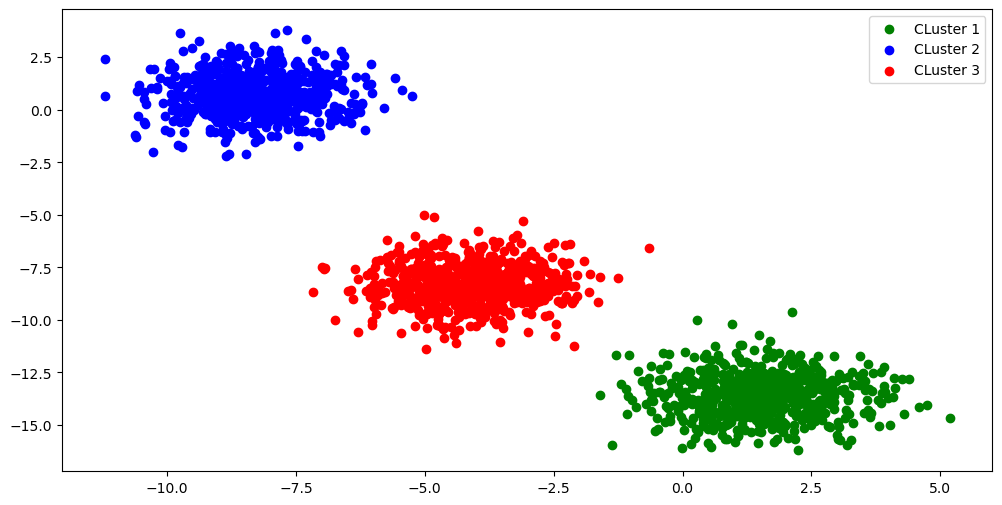

In [15]:
plt.scatter(df1.X, df1['Y'], color = 'Green', label = 'CLuster 1')
plt.scatter(df2.X, df2['Y'], color = 'Blue', label = 'CLuster 2')
plt.scatter(df3.X, df3['Y'], color = 'Red', label = 'CLuster 3')
plt.legend()
plt.show()

In [16]:
# Centroid Value 
kmean.cluster_centers_

array([[  1.52419272, -13.5935043 ],
       [ -8.31217971,   0.69225267],
       [ -4.12693297,  -8.27316   ]])

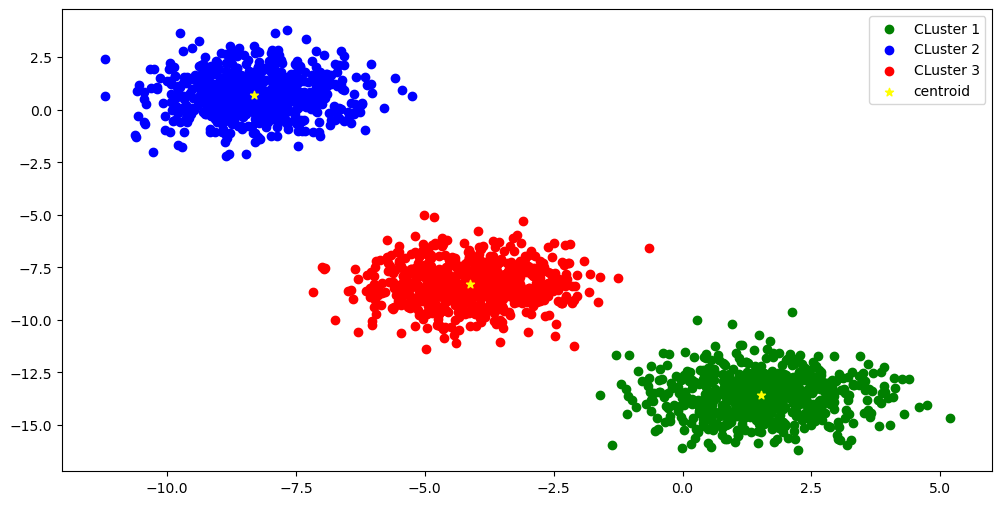

In [17]:
plt.scatter(df1.X, df1['Y'], color = 'Green', label = 'CLuster 1')
plt.scatter(df2.X, df2['Y'], color = 'Blue', label = 'CLuster 2')
plt.scatter(df3.X, df3['Y'], color = 'Red', label = 'CLuster 3')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], color = 'Yellow', marker = '*', label = 'centroid')
plt.legend()
plt.show()

# Elbow testing in Clustering
### The Elbow method is used to determine the optimal number of clusters in a data set for cluster analysis

In [18]:
kmeans_elbow = KMeans()

In [19]:
import scikitplot as skplt

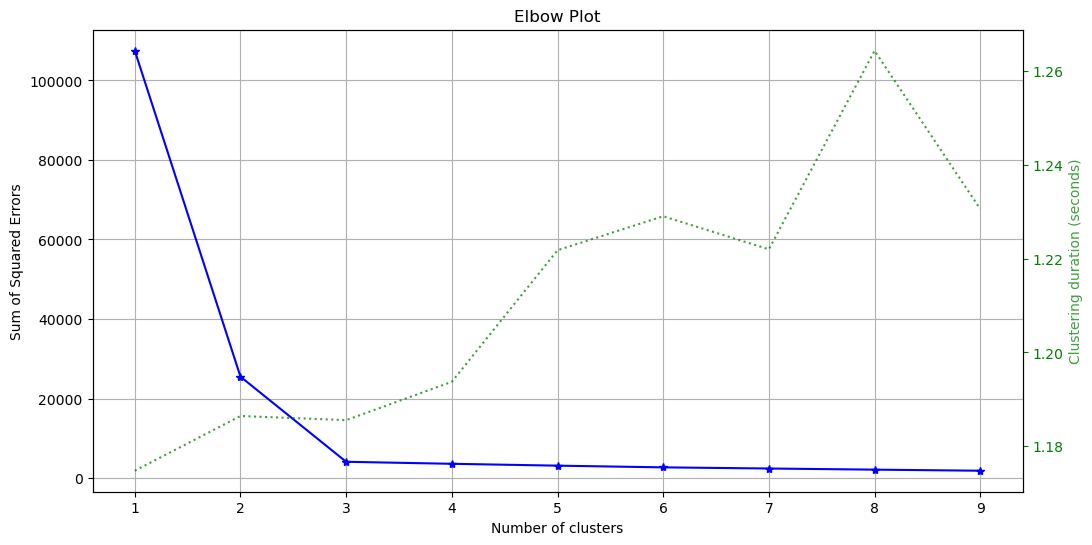

In [20]:
skplt.cluster.plot_elbow_curve(kmeans_elbow, cd, cluster_ranges = range(1, 10))
plt.show()

# Clustering 2

In [21]:
cd2 = pd.read_csv('clustering_data_2.csv')
cd2.head()

,X,Y
0,-0.472231,0.036999
1,-0.160415,-0.448140
2,-0.521661,0.904800
3,-0.986056,-0.347668
4,-0.068556,0.986253


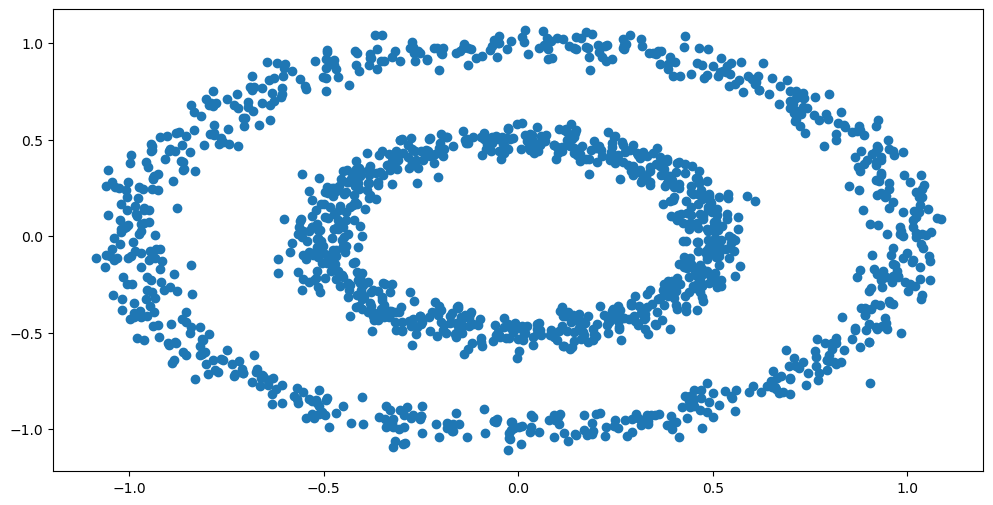

In [22]:
plt.scatter(cd2['X'], cd2['Y'])

In [23]:
k_mean2 = KMeans(n_clusters = 3)
k_mean2.fit(cd2)

KMeans(n_clusters=3)

In [24]:
cluster_assignment2 = k_mean2.predict(cd2)

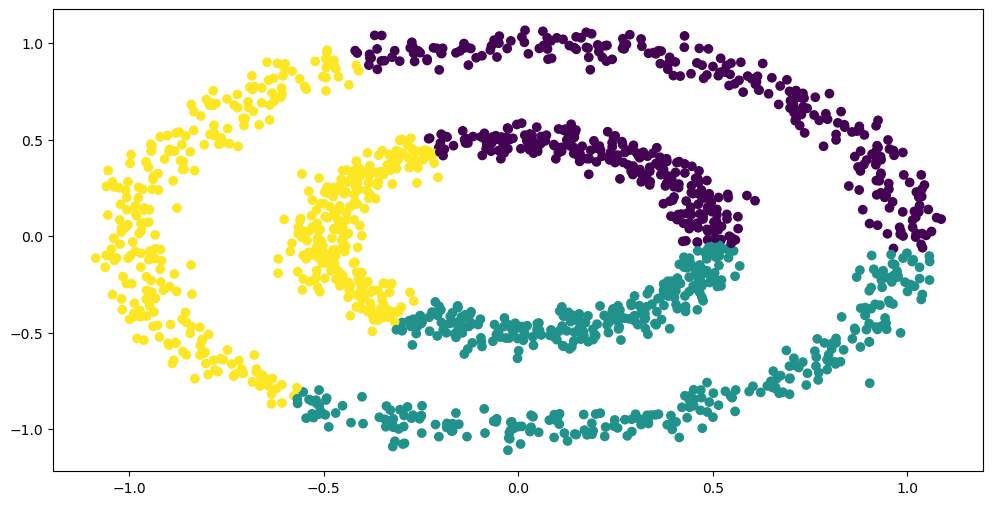

In [25]:
plt.scatter(cd2['X'], cd2['Y'], c = cluster_assignment2)

In [26]:
cd3 = pd.read_csv('clustering_data_3.csv')
cd3.head()

,X,Y
0,0.657192,0.787898
1,0.673324,-0.407170
2,1.072774,-0.436554
3,0.538474,-0.379443
4,-0.457094,0.882077


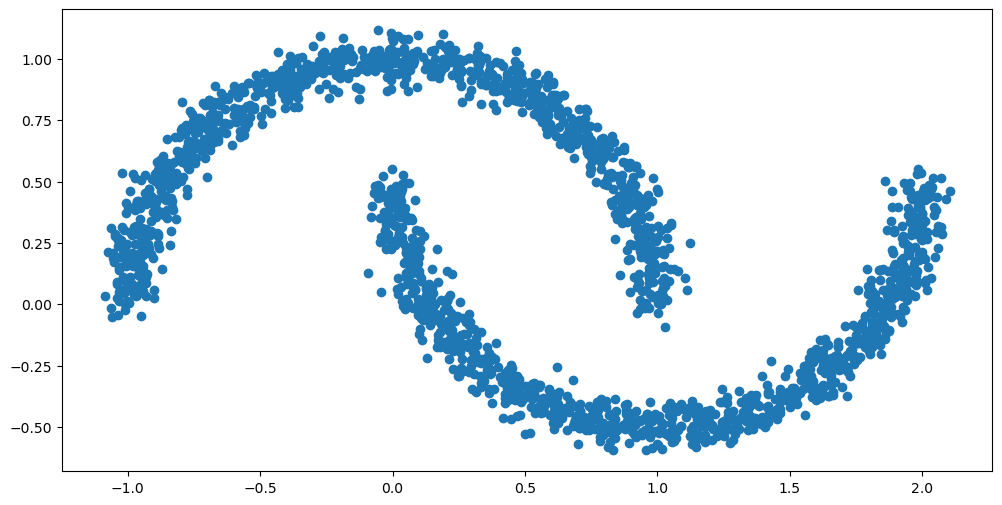

In [27]:
plt.scatter(cd3['X'], cd3['Y'])

In [28]:
k_mean3 = KMeans(n_clusters = 2)
k_mean3.fit(cd3)


KMeans(n_clusters=2)

In [29]:
cluster_assignment3 = k_mean3.predict(cd3)

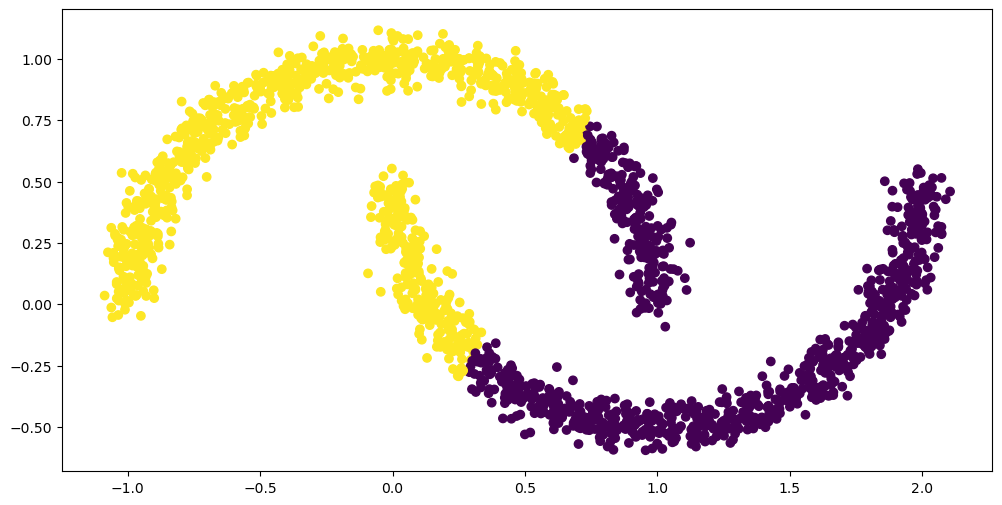

In [30]:
plt.scatter(cd3['X'], cd3['Y'], c = cluster_assignment3)

In [31]:
from sklearn.cluster import SpectralClustering

In [33]:
clus = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors' )

In [34]:
clus.fit(cd2)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [35]:
cluster_assignment = clus.labels_

In [36]:
cluster_assignment

array([1, 1, 0, ..., 0, 0, 1])

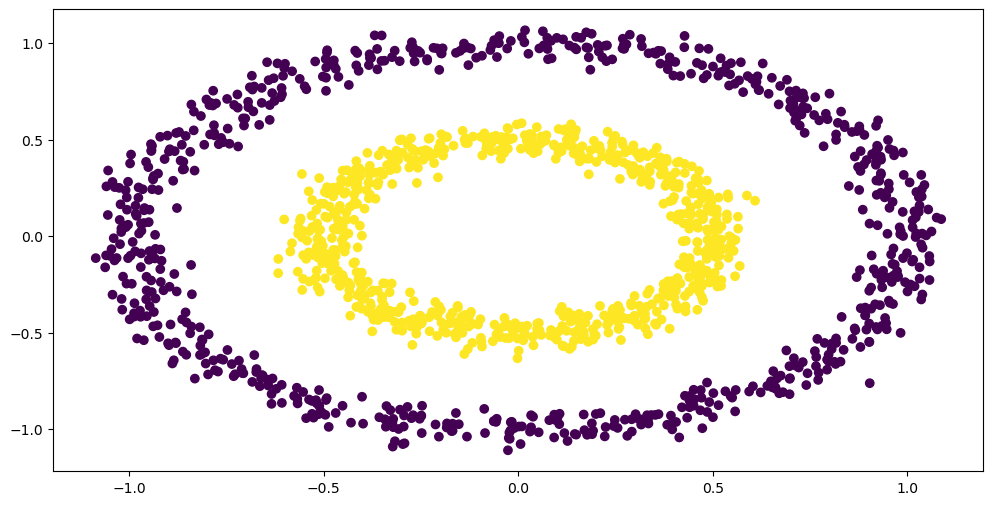

In [39]:
plt.scatter(cd2['X'], cd2['Y'], c = cluster_assignment)

In [40]:
clus3 = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors' )

In [41]:
clus3.fit(cd3)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [44]:
cluster_assignment3 = clus3.labels_

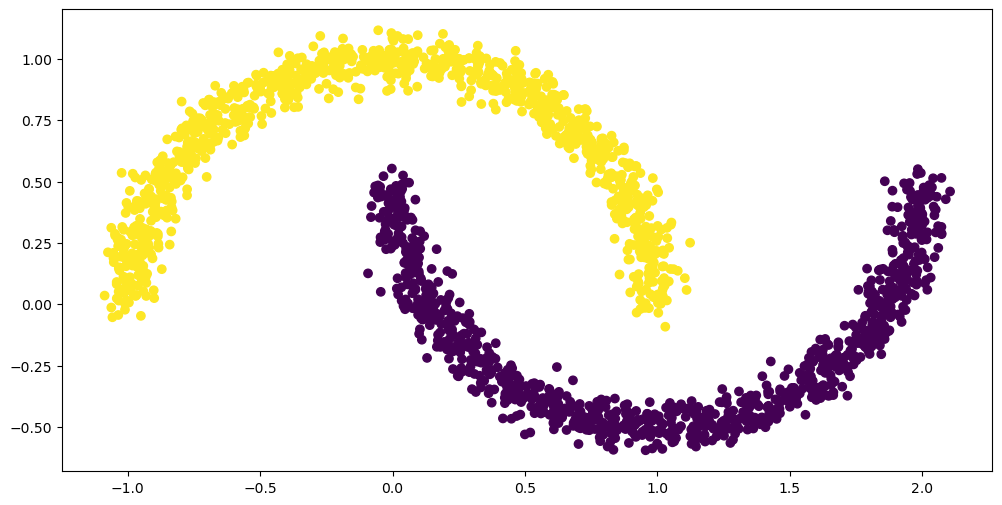

In [45]:
plt.scatter(cd3['X'], cd3['Y'], c = cluster_assignment3)


### Cluster the Olivetti faces dataset
#### This classic olivetti face dataset contains 400 grayscale 64 * 64 pixel imgaes of faces each image is flattened to a 1 D vector of size 4096., 40 different people were photographed 10 times of each and usual task is to train a model that can predict which person is represented in each picture

In [47]:
# Loading of the dataset
from sklearn.datasets import fetch_olivetti_faces

In [48]:
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\subha\scikit_learn_data


In [50]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [52]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [53]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

### Split it into training , validataion and test set , Note  - The dataset is already scaled between 0 to 1, since the dataset is quite small , you probably want to use sratified sampling to ensure that there are the same number of images per person in each set 

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

In [66]:

strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 40, random_state = 40)

train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

X_train_valid = olivetti.data[train_valid_idx]
Y_train_valid = olivetti.target[train_valid_idx]

X_test = olivetti.data[test_idx]
Y_test = olivetti.target[test_idx]

# test_size = 80

strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 80, random_state = 43)

train_idx, valid_idx = next(strat_split.split(X_train_valid, Y_train_valid))

X_train = X_train_valid[train_idx]
Y_train = Y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
Y_valid = Y_train_valid[valid_idx]

In [67]:
print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)



(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [70]:
pca.n_components_

198

In [72]:
from sklearn.cluster import KMeans

In [78]:
k_range = range(5, 150, 5)
kmeans_per_k = [] # empty list
for k in k_range:
    print('k = {}'.format(k))
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k = 5
k = 10
k = 15
k = 20
k = 25
k = 30
k = 35
k = 40
k = 45
k = 50
k = 55
k = 60
k = 65
k = 70
k = 75
k = 80
k = 85
k = 90
k = 95
k = 100
k = 105
k = 110
k = 115
k = 120
k = 125
k = 130
k = 135
k = 140
k = 145


In [79]:
from sklearn.metrics import silhouette_score

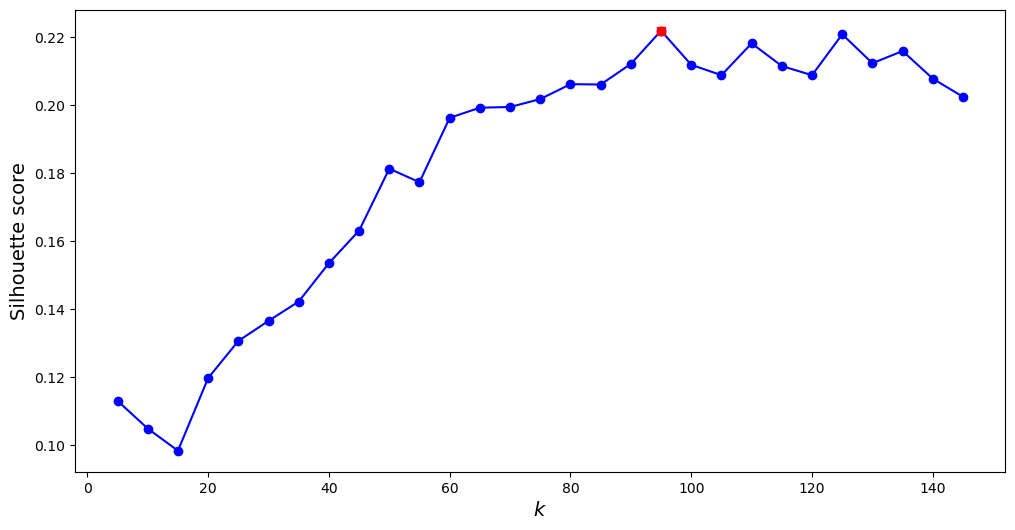

In [86]:
silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                   for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Silhouette score', fontsize = 14)
plt.plot(best_k, best_score, 'rs')
plt.show()

In [85]:
best_k

95

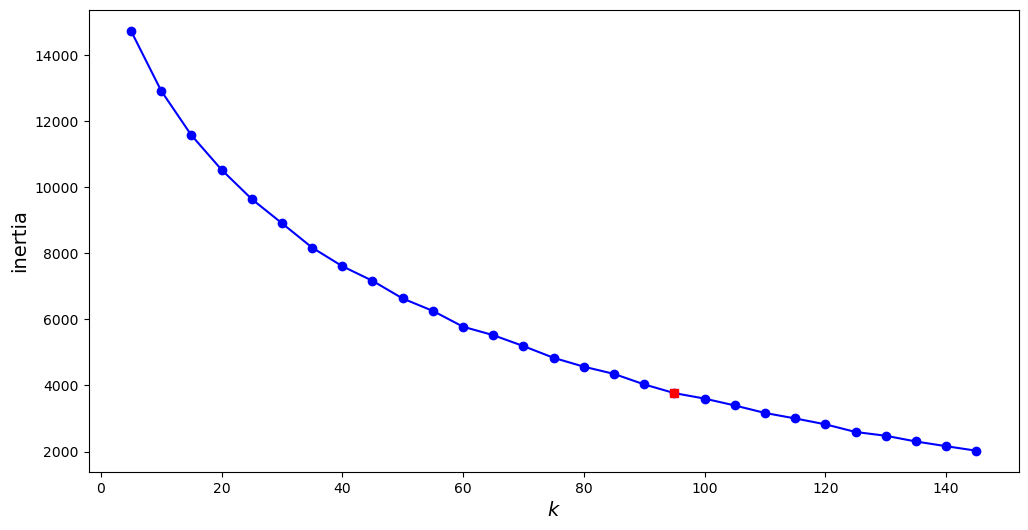

In [87]:
#inertia
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('inertia', fontsize = 14)
plt.plot(best_k, best_inertia, 'rs')
plt.show()

In [89]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=95, random_state=42)

In [97]:
def plot_faces(face, labels, n_cols = 5):
    faces = face.reshape(-1 , 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize = (n_cols, n_rows*1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(face, cmap = 'gray')
        plt.axis('off')
        plt.title(label)
    plt.show()


Cluster 0


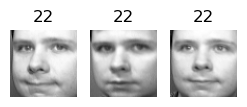

Cluster 1


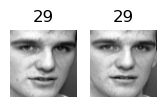

Cluster 2


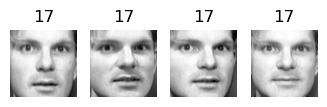

Cluster 3


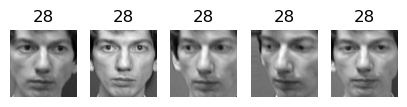

Cluster 4


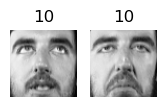

Cluster 5


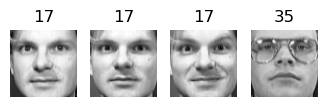

Cluster 6


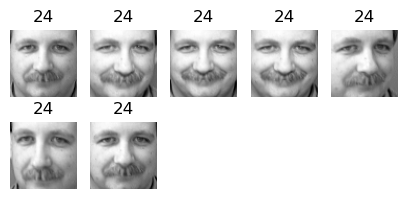

Cluster 7


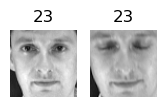

Cluster 8


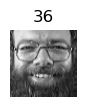

Cluster 9


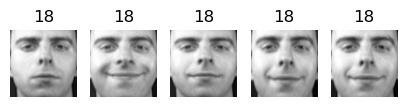

Cluster 10


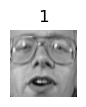

Cluster 11


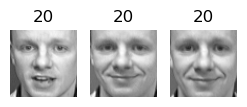

Cluster 12


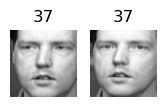

Cluster 13


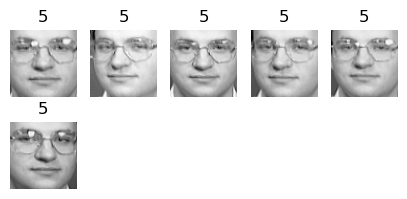

Cluster 14


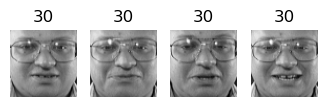

Cluster 15


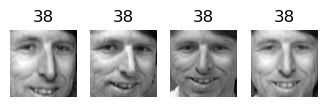

Cluster 16


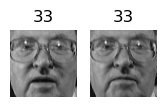

Cluster 17


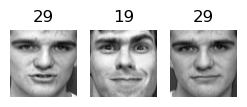

Cluster 18


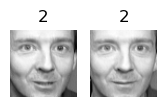

Cluster 19


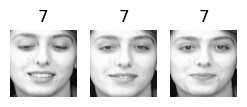

Cluster 20


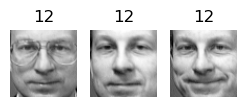

Cluster 21


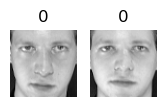

Cluster 22


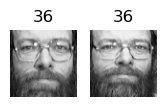

Cluster 23


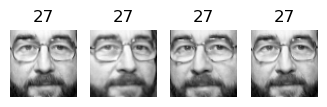

Cluster 24


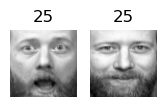

Cluster 25


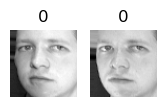

Cluster 26


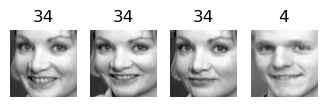

Cluster 27


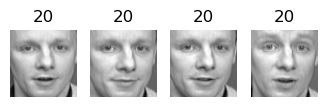

Cluster 28


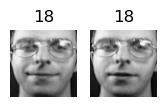

Cluster 29


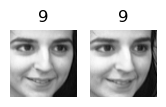

Cluster 30


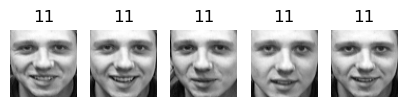

Cluster 31


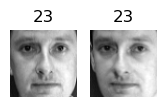

Cluster 32


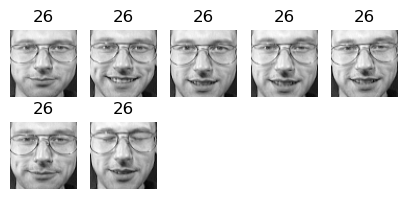

Cluster 33


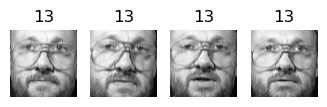

Cluster 34


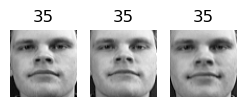

Cluster 35


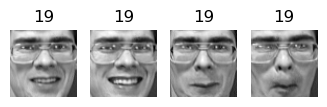

Cluster 36


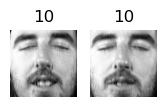

Cluster 37


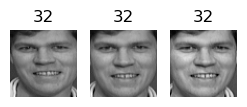

Cluster 38


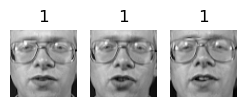

Cluster 39


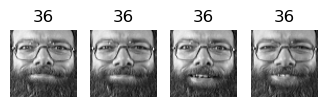

Cluster 40


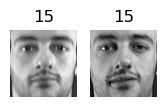

Cluster 41


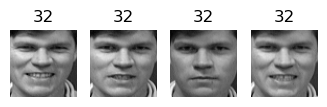

Cluster 42


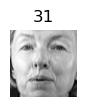

Cluster 43


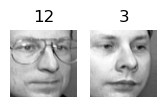

Cluster 44


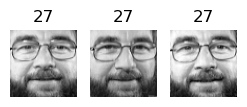

Cluster 45


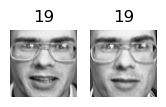

Cluster 46


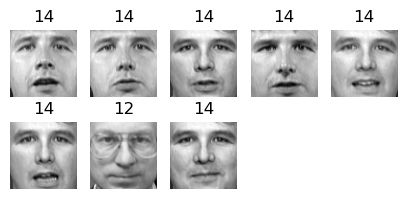

Cluster 47


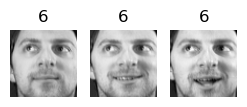

Cluster 48


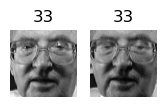

Cluster 49


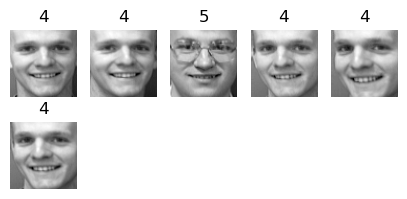

Cluster 50


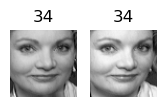

Cluster 51


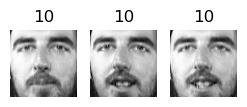

Cluster 52


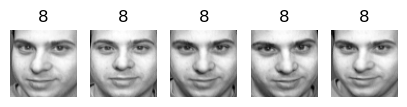

Cluster 53


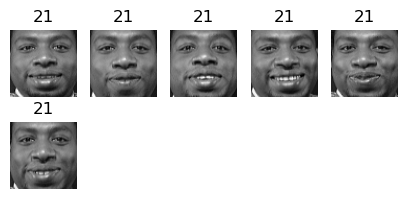

Cluster 54


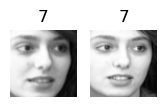

Cluster 55


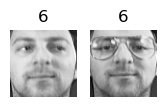

Cluster 56


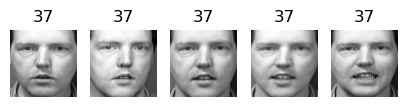

Cluster 57


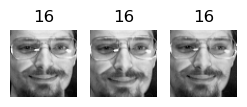

Cluster 58


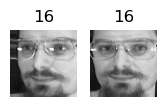

Cluster 59


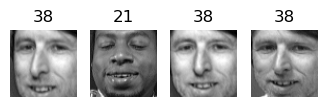

Cluster 60


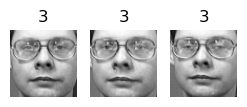

Cluster 61


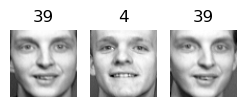

Cluster 62


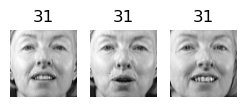

Cluster 63


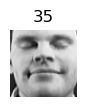

Cluster 64


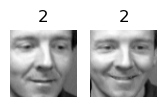

Cluster 65


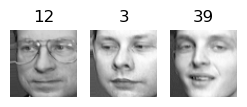

Cluster 66


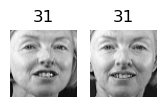

Cluster 67


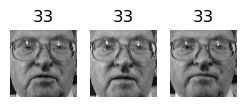

Cluster 68


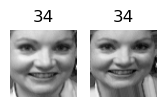

Cluster 69


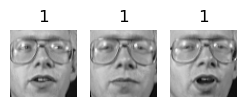

Cluster 70


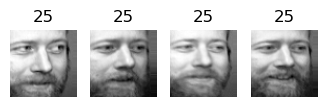

Cluster 71


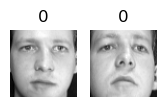

Cluster 72


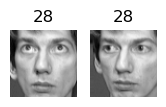

Cluster 73


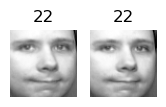

Cluster 74


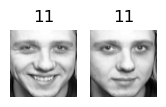

Cluster 75


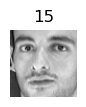

Cluster 76


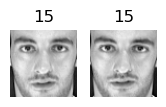

Cluster 77


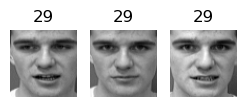

Cluster 78


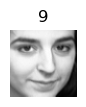

Cluster 79


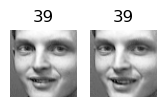

Cluster 80


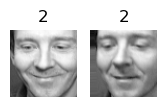

Cluster 81


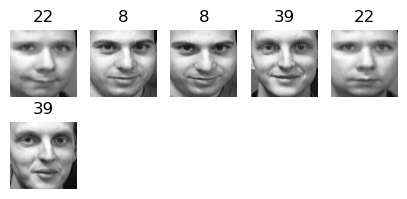

Cluster 82


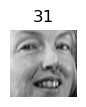

Cluster 83


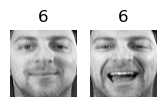

Cluster 84


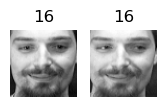

Cluster 85


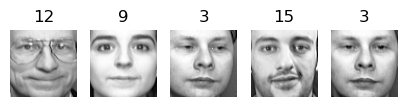

Cluster 86


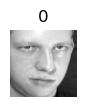

Cluster 87


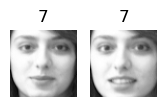

Cluster 88


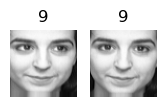

Cluster 89


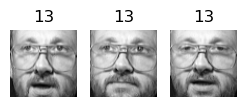

Cluster 90


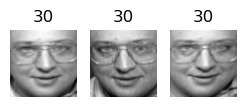

Cluster 91


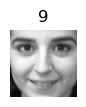

Cluster 92


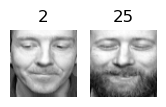

Cluster 93


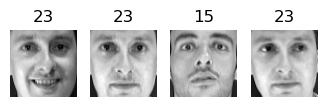

Cluster 94


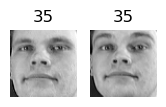

In [98]:
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = Y_train[in_cluster]
    plot_faces(faces, labels)